# SM Lab: воронка онлайн-продаж

Описание базы: Данные содержат информацию о взаимодействии пользователей
с диджитал каналами Спортмастера (мобильное приложение, сайт) в период
с 01.06.2024 по 21.06.2024. 
Датасет содержит информацию по этапам воронки
продаж (клики на карточку товара, добавления в корзину, оформление заказа).
За основу взяты clickstream данные пользователей, собранные с диджитал
каналов Спортмастера (сайт, мобильное приложение).

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

## Загрузка данных

In [5]:
#df = pd.read_csv('sportmaster_dataset.csv')
df = pd.read_csv('sm_verySmall_random.csv')
df.head(5)

,device_type,event_id,user_id,user_is_authorized,location_id,create_timestamp,product_id,product_is_pick_up,product_is_pick_point,product_is_delivery,product_is_now,product_price,product_category,product_gender,product_age,brand_lvl,add_to_cart_flag,create_order_flag
0,desktop,044bb490-c344-4947-9d34-e61cc0171bbb,14,0,2270,2024-06-02T16:15:52.826Z,20864,1,1,1,0,5599,инвентарь,унисекс,взрослые,2,0,0
1,mobileapp_android,c1deba65-7b82-4fa8-848e-363f8745bccd,45,0,2080,2024-06-21T02:10:03.551Z,34819,1,1,1,1,3599,одежда,мужской,взрослые,0,0,0
2,desktop,a60f006c-cc65-4e4d-841c-627a2d7f4f54,108,0,968,2024-06-01T14:35:00.154Z,44123,0,1,1,1,8499,одежда,мужской,взрослые,1,0,0
3,desktop,5d00c0b7-1824-4f0d-94a1-d912b6490a28,145,0,725,2024-06-08T20:23:02.677Z,58259,1,1,1,0,4874,обувь,женский,взрослые,1,0,0
4,desktop,57035133-63bd-406b-916b-f7574f7e3827,145,0,725,2024-06-08T18:30:02.839Z,58257,1,1,1,1,4874,обувь,мужской,взрослые,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99617 entries, 0 to 99616
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   device_type            99617 non-null  object
 1   event_id               99617 non-null  object
 2   user_id                99617 non-null  int64 
 3   user_is_authorized     99617 non-null  int64 
 4   location_id            99617 non-null  int64 
 5   create_timestamp       99617 non-null  object
 6   product_id             99617 non-null  int64 
 7   product_is_pick_up     99617 non-null  int64 
 8   product_is_pick_point  99617 non-null  int64 
 9   product_is_delivery    99617 non-null  int64 
 10  product_is_now         99617 non-null  int64 
 11  product_price          99617 non-null  int64 
 12  product_category       99617 non-null  object
 13  product_gender         99617 non-null  object
 14  product_age            99617 non-null  object
 15  brand_lvl          

## EDA 

### Проверка пропущеных значений

In [7]:
df.isna().sum()

device_type              0
event_id                 0
user_id                  0
user_is_authorized       0
location_id              0
create_timestamp         0
product_id               0
product_is_pick_up       0
product_is_pick_point    0
product_is_delivery      0
product_is_now           0
product_price            0
product_category         0
product_gender           0
product_age              0
brand_lvl                0
add_to_cart_flag         0
create_order_flag        0
dtype: int64

In [8]:
cols = ['product_is_pick_up', 'product_is_pick_point', 'product_is_delivery', 'product_is_now']
df = df.dropna(subset=cols)

Очищаем строки, где есть пустое значение, т.к. 11 незначительное количество строк, по сравнению с 7000000

### Дубликаты

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop_duplicates()
len(df)

99617

### Создание полезных признаков из временной метки и перевод значений в int 

In [11]:
#df['create_timestamp'] = pd.to_datetime(df['create_timestamp'])
df['create_timestamp'] = pd.to_datetime(df['create_timestamp'], format='ISO8601')
df['date'] = df['create_timestamp'].dt.date
df['hour'] = df['create_timestamp'].dt.hour

df['user_id'] = df['user_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['location_id'] = df['location_id'].astype(str)

## Анализ воронки продаж

### Общие метрики воронки

In [12]:
total_views = df.shape[0]
added_to_cart = df[df['add_to_cart_flag'] == 1]['event_id'].nunique()
created_orders = df[df['create_order_flag'] == 1]['event_id'].nunique()

print("Анализ общей воронки продаж:")
print(f"Количество просмотров карточек: {total_views}")
print(f"Количество добавлений в корзину: {added_to_cart}")
print(f"Количество оформленных заказов: {created_orders}")
print(f"Конверсия просмотр -> корзина: {added_to_cart / total_views:.2%}")
print(f"Конверсия корзина -> заказ: {created_orders / added_to_cart:.2%}")

Анализ общей воронки продаж:
Количество просмотров карточек: 99617
Количество добавлений в корзину: 18790
Количество оформленных заказов: 5071
Конверсия просмотр -> корзина: 18.86%
Конверсия корзина -> заказ: 26.99%


In [13]:
import plotly.graph_objects as go

funnel_data = pd.DataFrame({
    'Этап': ['Просмотры', 'Добавлено в корзину', 'Заказы'],
    'Количество': [total_views, added_to_cart, created_orders]
})

fig = go.Figure(go.Funnel(
    y = funnel_data['Этап'],
    x = funnel_data['Количество'],
    textinfo = "value+percent initial"
))

fig.update_layout(
    title_text='Воронка онлайн-продаж',
    title_x=0.5,
    font_size=14
)
fig.show()

### Анализ по типу устройства

In [14]:
funnel_by_device = df.groupby('device_type').agg(
    total_views=('event_id', 'count'),
    added_to_cart=('add_to_cart_flag', lambda x: (x == 1).sum()),
    created_orders=('create_order_flag', lambda x: (x == 1).sum())
).reset_index()

funnel_by_device['click_to_cart_rate'] = funnel_by_device['added_to_cart'] / funnel_by_device['total_views']
funnel_by_device['cart_to_order_rate'] = funnel_by_device['created_orders'] / funnel_by_device['added_to_cart']
funnel_by_device.fillna(0, inplace=True) # Заполняем nan если нет добавлений в корзину

print("Воронка продаж по типу устройства ")
print(funnel_by_device.to_string())

Воронка продаж по типу устройства 
         device_type  total_views  added_to_cart  created_orders  click_to_cart_rate  cart_to_order_rate
0            desktop        11788           1367             314            0.115965            0.229700
1  mobileapp_android        56175          10817            2935            0.192559            0.271332
2      mobileapp_ios        31654           6606            1822            0.208694            0.275810


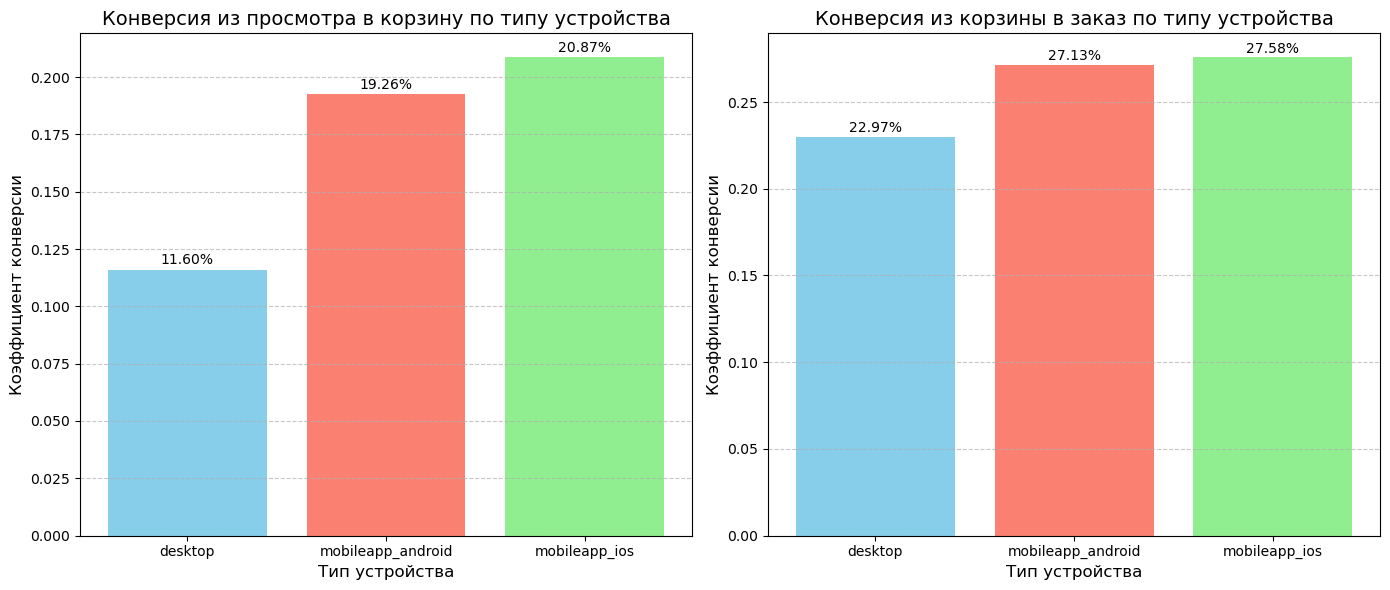

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(funnel_by_device['device_type'], funnel_by_device['click_to_cart_rate'], color=['skyblue', 'salmon', 'lightgreen'])
axes[0].set_title('Конверсия из просмотра в корзину по типу устройства', fontsize=14)
axes[0].set_ylabel('Коэффициент конверсии', fontsize=12)
axes[0].set_xlabel('Тип устройства', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for i, rate in enumerate(funnel_by_device['click_to_cart_rate']):
    axes[0].text(i, rate + 0.001, f'{rate:.2%}', ha='center', va='bottom', fontsize=10)


axes[1].bar(funnel_by_device['device_type'], funnel_by_device['cart_to_order_rate'], color=['skyblue', 'salmon', 'lightgreen'])
axes[1].set_title('Конверсия из корзины в заказ по типу устройства', fontsize=14)
axes[1].set_ylabel('Коэффициент конверсии', fontsize=12)
axes[1].set_xlabel('Тип устройства', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


for i, rate in enumerate(funnel_by_device['cart_to_order_rate']):
    axes[1].text(i, rate + 0.001, f'{rate:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Анализ по авторизации

In [16]:
funnel_by_auth = df.groupby('user_is_authorized').agg(
    total_views=('event_id', 'count'),
    added_to_cart=('add_to_cart_flag', lambda x: (x == 1).sum()),
    created_orders=('create_order_flag', lambda x: (x == 1).sum())
).reset_index()

funnel_by_auth['click_to_cart_rate'] = funnel_by_auth['added_to_cart'] / funnel_by_auth['total_views']
funnel_by_auth['cart_to_order_rate'] = funnel_by_auth['created_orders'] / funnel_by_auth['added_to_cart']
funnel_by_auth['user_is_authorized'] = funnel_by_auth['user_is_authorized'].map({1: 'Авторизован', 0: 'Не авторизован'})
funnel_by_auth.fillna(0, inplace=True)

print("Воронка продаж по авторизации пользователя")
print(funnel_by_auth.to_string())

Воронка продаж по авторизации пользователя
  user_is_authorized  total_views  added_to_cart  created_orders  click_to_cart_rate  cart_to_order_rate
0     Не авторизован        12824            974              44            0.075951            0.045175
1        Авторизован        86793          17816            5027            0.205270            0.282162


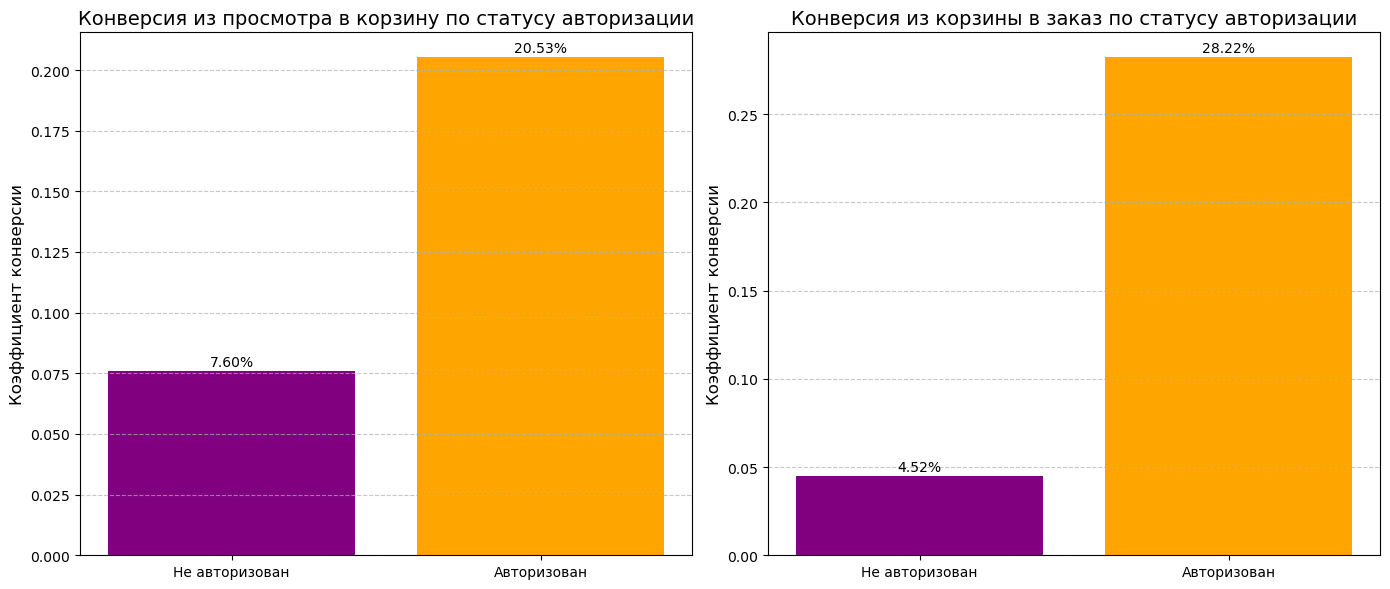

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(funnel_by_auth['user_is_authorized'], funnel_by_auth['click_to_cart_rate'], color=['purple', 'orange'])
axes[0].set_title('Конверсия из просмотра в корзину по статусу авторизации', fontsize=14)
axes[0].set_ylabel('Коэффициент конверсии', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for i, rate in enumerate(funnel_by_auth['click_to_cart_rate']):
    axes[0].text(i, rate + 0.001, f'{rate:.2%}', ha='center', va='bottom', fontsize=10)

axes[1].bar(funnel_by_auth['user_is_authorized'], funnel_by_auth['cart_to_order_rate'], color=['purple', 'orange'])
axes[1].set_title('Конверсия из корзины в заказ по статусу авторизации', fontsize=14)
axes[1].set_ylabel('Коэффициент конверсии', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for i, rate in enumerate(funnel_by_auth['cart_to_order_rate']):
    axes[1].text(i, rate + 0.001, f'{rate:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

###  Анализ по категории товара

In [18]:
category_conversion = df.groupby('product_category').agg(
    total_views=('event_id', 'count'),
    created_orders=('create_order_flag', lambda x: (x == 1).sum())
)
category_conversion['conversion_rate'] = category_conversion['created_orders'] / category_conversion['total_views']

print("Конверсия по категориям товаров топ-5")
print(category_conversion.sort_values(by='conversion_rate', ascending=False).head(5))

Конверсия по категориям товаров топ-5
                  total_views  created_orders  conversion_rate
product_category                                              
одежда                  47597            2593         0.054478
инвентарь               13870             711         0.051262
обувь                   38150            1767         0.046317


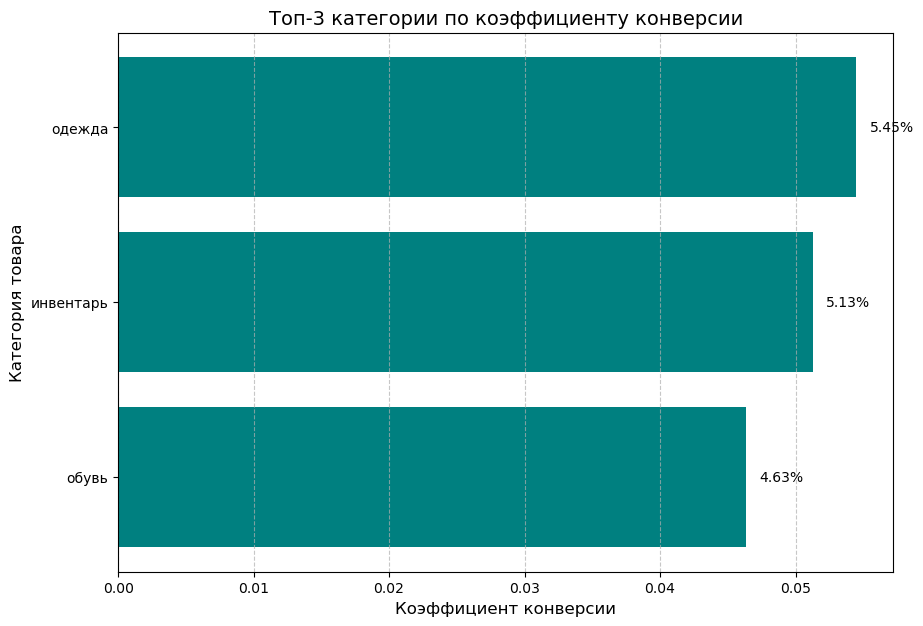

In [19]:
top_3_categories = category_conversion.sort_values(by='conversion_rate', ascending=False).head(5)

plt.figure(figsize=(10, 7))
plt.barh(top_3_categories.index, top_3_categories['conversion_rate'], color='teal')
plt.xlabel('Коэффициент конверсии', fontsize=12)
plt.ylabel('Категория товара', fontsize=12)
plt.title('Топ-3 категории по коэффициенту конверсии', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(top_3_categories['conversion_rate']):
    plt.text(value + 0.001, index, f'{value:.2%}', va='center', fontsize=10)

plt.gca().invert_yaxis() 
plt.show()

### Сегментация клиентов (RFM)

In [20]:
orders_df = df[df['create_order_flag'] == 1].copy()

last_date = df['create_timestamp'].max() + pd.Timedelta(days=1)


rfm_df = orders_df.groupby('user_id').agg(
    Recency=('create_timestamp', lambda x: (last_date - x.max()).days),
    Frequency=('event_id', 'count'),
    Monetary=('product_price', 'sum')
).reset_index()

rfm_df['R_score_temp'] = pd.qcut(rfm_df['Recency'], 5, labels=False, duplicates='drop')
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=False, duplicates='drop') + 1

max_r_score = rfm_df['R_score_temp'].max()
rfm_df['R_score'] = max_r_score - rfm_df['R_score_temp'] + 1


rfm_df['RFM_score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

def rfm_segment(score):
    if score in ['555', '544', '455', '445']:
        return 'Чемпионы'
    elif score in ['511', '411', '311']:
        return 'Новички'
    elif score in ['155', '144', '154']:
        return 'Спящие'
    else:
        return 'Другие'

rfm_df['Segment'] = rfm_df['RFM_score'].apply(rfm_segment)

print("\n--- Распределение пользователей по сегментам ---")
print(rfm_df['Segment'].value_counts())


--- Распределение пользователей по сегментам ---
Segment
Другие     2640
Новички     390
Name: count, dtype: int64


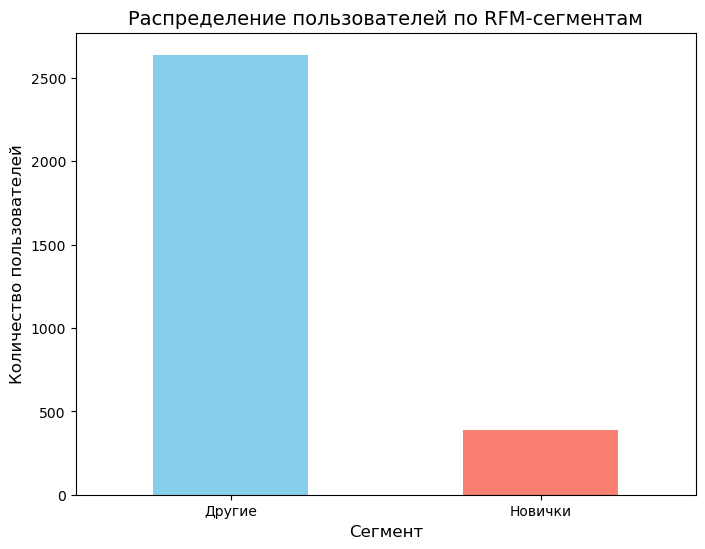

In [21]:
segment_counts = rfm_df['Segment'].value_counts()

plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение пользователей по RFM-сегментам', fontsize=14)
plt.xlabel('Сегмент', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Датасет охватывает всего 21 день. За этот короткий период большинство пользователей, которые совершили покупку, сделали это только один раз. Они не могут быть отнесены к «Чемпионам» (потому что их Frequency слишком низка), но и не являются «Спящими» (потому что их Recency слишком высока). Они попадают в сегмент «Другие».